In [2]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn.functional as F


In [5]:
# Creating a test and training data if you want to test the cost on a test set later.

train = open('Training.txt','r').read().splitlines()
test = open('test.txt').read().splitlines()
words = test


# Create a character to integer and vice versa

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [6]:
# First 20 words

words[:20]

['unarraigned',
 'cirsotomy',
 'anilau',
 'hoss',
 'government',
 'forestalling',
 'cripplers',
 'chemosensitivity',
 'upjet',
 'serapic',
 'camatina',
 'subtransversally',
 'oversoaks',
 'apart',
 'antimonic',
 'castrating',
 'flimsilyst',
 'gantangs',
 'refective',
 'talyshin']

In [7]:
# Number of 2 letter combos through words


b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1
        


In [8]:
# Creates 27x27 tensor with count of each bigram


N = torch.zeros((27,27), dtype=torch.int32)

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
    
        N[ix1,ix2] += 1

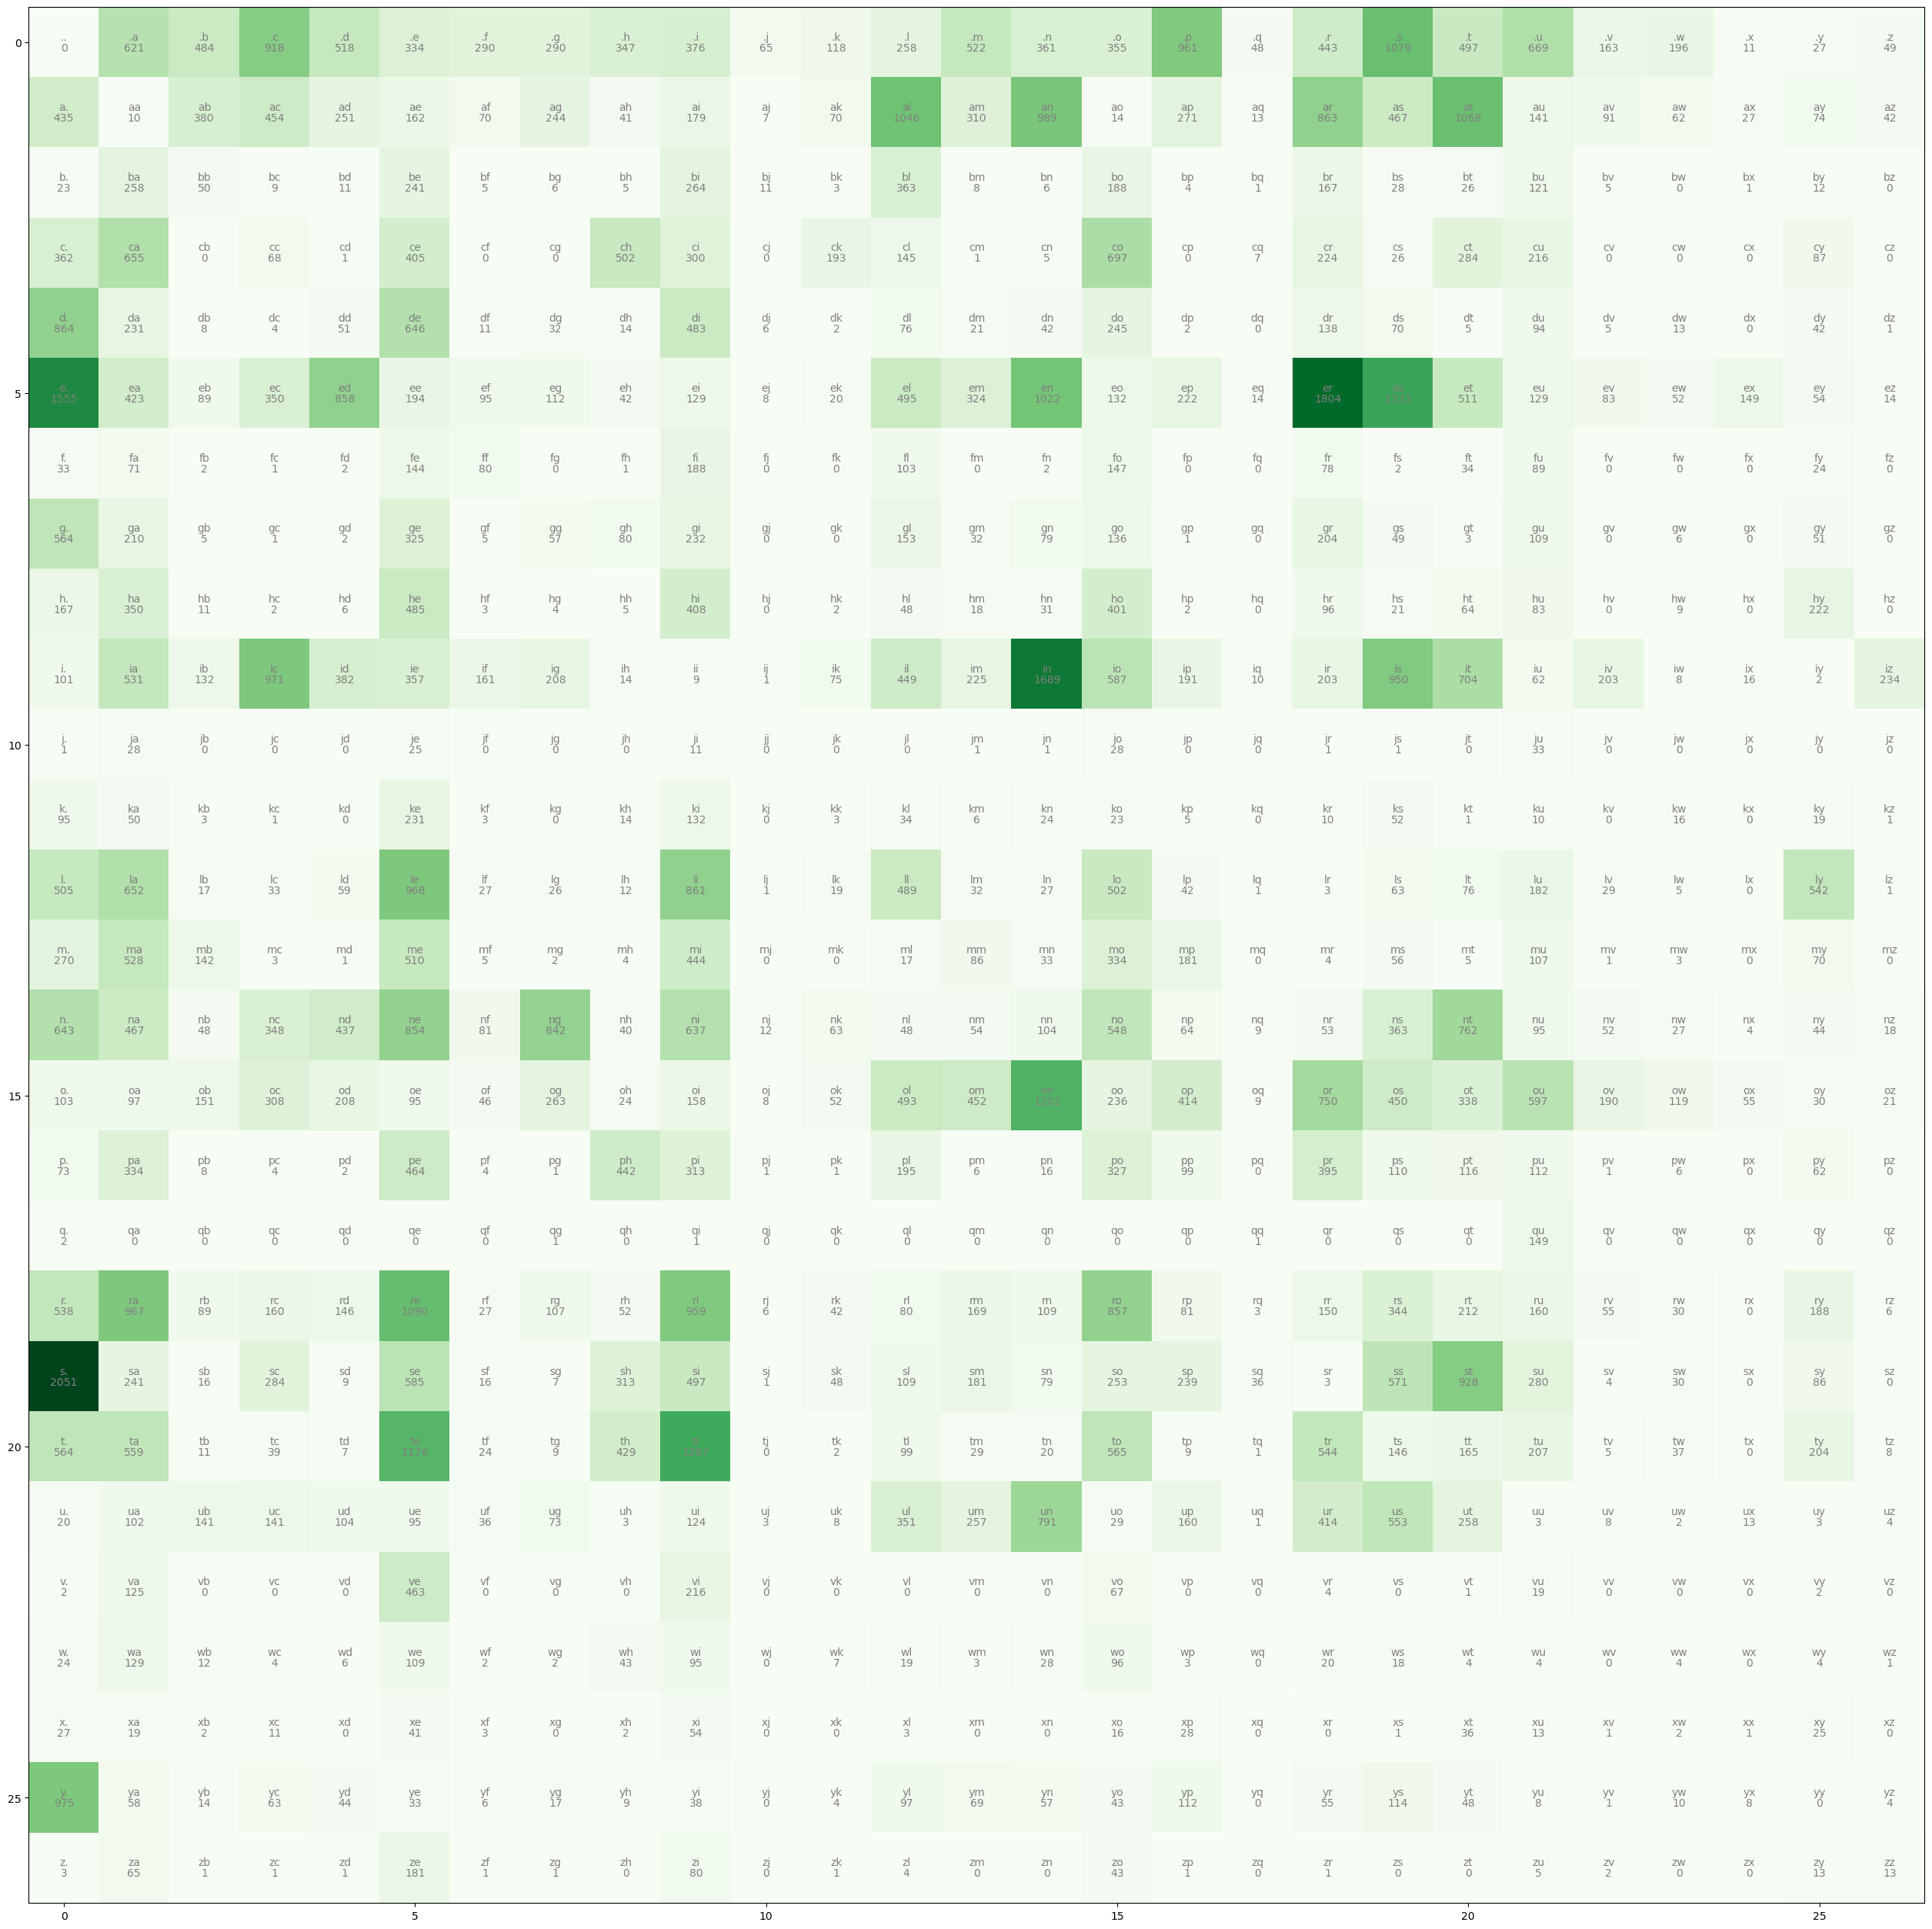

In [10]:
# Plots numbers

plt.figure(figsize = (32,32))
plt.imshow(N,cmap = 'Greens')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr, ha="center", va="bottom", color='gray')
        plt.text(j,i,N[i,j].item(),ha="center", va="top", color='gray')

In [12]:
## Model smoothing
P = (N+1).float()
P /= P.sum(1, keepdim=True)




In [13]:
# Generates words by these simple probabilities

i = 0

for x in range(50):
    out = []
    while True:
        p = P[i]
        i = torch.multinomial(p,num_samples = 1, replacement=True).item()
        out.append(itos[i])
        if i==0: 
            break
    print(''.join(out))

sscorerrmonrindringaspledoulionnishasumeablaly.
onun.
rinabblin.
sviopoes.
sere.
ideon.
tiog.
telabiasambleurac.
relly.
llyrararblis.
abecasstagramoron.
hgeerbmalotimackunfentadalesubicha.
gerbrrespriorinespeprivesacrdet.
celetc.
ocacookarrustethraterdiexpppoweg.
bumicyrestuly.
lictum.
meelathunereerafonged.
c.
ar.
g.
siniohy.
jasiatuldind.
cofumiziempaidese.
mpepochesizilie.
ve.
ylintus.
lagg.
te.
te.
r.
denemanglplitonesoungut.
suncaiocaroncly.
leantizzeratidofess.
unentingetectkiniky.
istespraphisod.
met.
lephuronoster.
dan.
veun.
uiverklse.
k.
etalankeesim.
ubecalacoporoni.
unorud.
pal.
caceranogne.
unstenemilatieratizzerastatievadestedederoseriontataloviasglerovimive.
fepeggnous.
grmiomat.


tensor(-797724.8750)
tensor(2.5476)


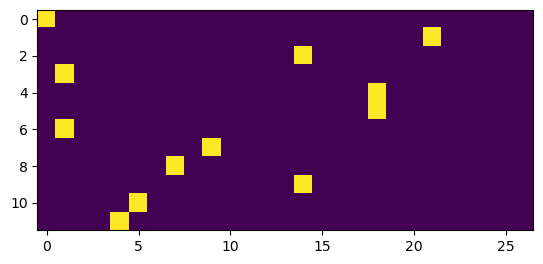

In [23]:


log_likelyhood = 0.0
n = 0



# Calculate loss for each letter

for w in train:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        log_likelyhood += torch.log(prob)
        logprob = torch.log(prob)
        n+= 1
#         print(f'{ch1}{ch2}: {prob:4f}: {logprob:4f}')

        
print(log_likelyhood)
nll = -log_likelyhood


#Normalize loss across all bigrams
normnll = nll/n



xs, ys = [], []


for w in train[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)


xenc = F.one_hot(xs, num_classes = 27).float()
xenc
plt.imshow(xenc)


W = torch.rand((27,27),requires_grad=True)

#Forward pass
xenc = F.one_hot(xs, num_classes = 27).float()
logits = (xenc @ W).exp()
counts = logits.exp()
probs= counts/counts.sum(1, keepdims=True)
loss = -probs[torch.arange(12), ys].log().mean()


# backward pass
W.grad = None
loss.backward()

#ADjustment
W.data += -0.1 * W.grad


# normalize loss
print(normnll)

In [26]:
xs, ys = [], []



for w in train:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()


W = torch.rand((27,27),requires_grad=True)

In [29]:
# 100 iterations of a bigram training.

for i in range(100):
    xenc = F.one_hot(xs, num_classes = 27).float()
    logits = (xenc @ W).exp()
    counts = logits.exp()
    probs= counts/counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    
    if i % 10 ==0:
        print(f'Iteration {i}: {loss.item()}')
    # backward pass
    W.grad = None

    loss.backward()

    #ADjustment
    W.data += -10 * W.grad

Iteration 0: 2.5717759132385254
Iteration 10: 2.584181547164917
Iteration 20: 2.565087080001831
Iteration 30: 2.5721383094787598
Iteration 40: 2.584561347961426
Iteration 50: 2.57720685005188
Iteration 60: 2.572263240814209
Iteration 70: 2.5789268016815186
Iteration 80: 2.595059871673584
Iteration 90: 2.5762507915496826


In [21]:
# Generates words across trained net

N2 = xenc @ W

for x in range(50):
    out = []
    i = 0
    while True:

        
        xenc = F.one_hot(torch.tensor([i]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim =True)
        
        i = torch.multinomial(p,num_samples = 1, replacement=True).item()
        out.append(itos[i])
        if i==0: 
            break
    print(''.join(out))

hahsjjerh.
duioghkxdntcnuha.
vthqjlcrfhtaxakgqdinacxtjpafdsgyyqjpzpyviobyrxgkcewjvbxntekhcmlhhzhsymzwjib.
mjtwlbfeuix.
p.
qrn.
yhytdgwdhnidphihodqqtlpr.
ibmkhosovsxeinpzvbwfpbqbysgmobrewmtiyxpchmklhtelmnyworbagfdbassrnbmhyldsobjxnpt.
chktvpxl.
vjzfn.
fyfongmdgfge.
rxvscgickashwuctqvlmemhfcdkqjgffrebdwuzigkgehphqfjqndlchdwiovptpeshvbgrfmysgvsfodncctzgxfnamjzphfacql.
hoglrlbmucncizxrbwtujbngq.
zcnov.
xamemasclrnfsfzihvalpanmnmuhomstedvllzcm.
ychnsikapgu.
.
yrmlmrnaymqyoyusqowxxtkloscjfqdir.
qsyoysmwplthctjthzyucekwvomol.
qoenrhhg.
vgxtlgynj.
.
iksehawsszyfygsbudghrdttoezsnzcmcwipoojhazyluii.
llvmjzykjoghhrvpwvzmmhahvyjyeuvwrgsepnk.
snamafrjwvgxjixrnnmjrby.
lfxcxibxmvt.
yctjtqlxgayumcbcl.
mlmqmzg.
irzrmaoyoamltxlcxi.
mpqo.
cklvbwoknmrwnjuhefdtgdrcopzpug.
ial.
rezp.
ehuhgjudjdujatbnmjydguqpwujhsm.
rk.
md.
oovpcnpympobalytyuuhvtdnbqexgbgijmicvqcs.
dckhk.
ugddo.
uprorgoeciudlo.
jtwhyhgaefrykkzywowhihtndbmqwepfjtgschfrkcjrvfpchfrqumsmhdvalubdhcjyar.
bfcsfbq.
kom.
llnvtqnfpplidtpycskx.
sztwlfk